In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

LOADING CSV and MYSQL


In [14]:
df=pd.read_csv("D:\OneDrive - AVASA\BYU-I\In-learning\python pandas analytics\Rev2022.csv")
dfrev=pd.DataFrame(df)
dfrev

,BRAND,status,dbr_date_out,dbr_date,loc_out,LOCACION_in,empl_out,gate_agent,number,Prep_Fuel,...,alf_fee_chg,ff_fee_chg,dmg_chg,schr_chg,vlf_chg,iva_chg,rpt_as_rev,other_chg,EST_TOTAL,GROSS_REVENUE
0,HERTZ,C,2021-10-28,2022-01-28,ZCL50,ZCL50,AMJUPI,NaN,F3190628,N,...,0.00,0.00,0.0,0.00,4748.60,15828.80,94181.40,0.0,114758.80,114758.80
1,HERTZ,C,2021-11-11,2022-01-11,TUX50,TUX50,AMENMP,WIC,F3213300,N,...,0.00,0.00,0.0,0.00,0.00,1674.24,10464.00,0.0,0.00,12138.24
2,HERTZ,C,2021-11-22,2022-01-10,GDL50,GDL50,AMROAG,WIC,F3232425,N,...,235.60,82.80,0.0,0.00,128.29,248.00,2696.28,0.0,2056.45,3263.25
3,HERTZ,C,2021-11-25,2022-01-14,CAN50,CAN52,AMCUKR,WIC,F3237477,N,...,9040.25,166.27,900.0,757.59,2854.81,9902.65,58302.99,0.0,1770.79,71960.45
4,HERTZ,C,2021-11-25,2022-01-19,MEX51,MEX51,AMSORV,WIC,F3236562,N,...,0.00,0.00,0.0,0.00,821.44,2738.24,16292.56,0.0,10138.40,19852.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534504,HERTZ,C,2022-11-06,2022-11-06,REX50,MTY50,AMPEHC,NaN,F3825983,N,...,561.91,183.80,0.0,10.00,177.45,302.54,3788.15,0.0,4268.14,4268.14
534505,HERTZ,C,2022-11-06,2022-11-06,TIJ51,TIJ51,AMJEMV,NaN,F3825236,N,...,102.94,33.40,0.0,10.00,32.51,54.98,688.15,0.0,775.64,775.64
534506,HERTZ,C,2022-11-06,2022-11-06,TIJ51,TIJ51,AMMONI,WIC,F3824939,N,...,58.90,59.33,0.0,0.00,58.60,31.00,1221.57,0.0,1377.83,1377.83
534507,THRIFTY,C,2022-11-06,2022-11-06,TMID51,TMID51,AMMAFC,AMNOCC,F3825323,N,...,0.00,40.50,0.0,0.00,36.76,0.00,779.60,0.0,940.50,940.50


In [15]:
import mysql.connector as mysql

HOST = "mysql3001.mochahost.com"
DATABASE = "brbr77_avasanet"
USER = "brbr77_auditor"
PASSWORD = "BrainPowder"

db_connection = mysql.connect(host=HOST, 
                              database=DATABASE, 
                              user=USER, 
                              password=PASSWORD)

print("Connected to:", db_connection.get_server_info())

Connected to: 5.6.33


In [24]:
data_veh=pd.read_sql("SELECT * FROM vehiculos",db_connection)
#list(data_veh.columns)
#data_veh.describe()
data_veh.head(10)

,id,Veh_number,Curr_odom,status_id,Notes,Year,Model,Color,Vin,Purch_date,...,locaciones_id,tank_size,tank2_size,class,sales_date,sales_price,turnback_check,make,options,type
0,1,KE0028,16,16,MEGA OAXACA SA DE CV,20.0,SEDONA,PLATA LJ,KNDMB5C25L6602934,2019-10-14,...,802,80.0,0.0,R,2021-08-12,395000.0,B,KIA,SEDONA LX,LX AUT
1,2,KE0029,16,16,FRANCOMOTORS AUTOMOTRIZ SA DE,20.0,SEDONA,AZUL LJ,KNDMB5C28L6602958,2019-10-14,...,214,80.0,0.0,R,2021-10-19,399000.0,B,KIA,SEDONA LX,LX AUT
2,3,KE0030,16,16,ABUSO DE CONFIANZA,20.0,SEDONA,BLANC EN,KNDMB5C28L6602698,2019-10-14,...,603,80.0,0.0,R,2022-12-27,331200.0,.,KIA,LX,SEDONA
3,4,KE0031,12,12,,20.0,SEDONA,PLATA EN,KNDMB5C24L6584104,2019-10-14,...,181,80.0,0.0,R,None,0.0,.,KIA,LX,SEDONA
4,5,KE0032,16,16,JUAN LUIS RODRIGUEZ VARGAS,20.0,SEDONA,BLANC LJ,KNDMB5C20L6602694,2019-10-14,...,1489,80.0,0.0,R,2021-11-19,439900.0,B,KIA,SEDONA LX,LX AUT
5,6,KE0033,16,16,ANGAR AZCAPOTZALCO SA DE CV,20.0,SEDONA,BLANC LJ,KNDMB5C27L6602420,2019-10-14,...,259,80.0,0.0,R,2021-05-18,392000.0,,KIA,SEDONA LX,LX AUT
6,7,KE0034,16,16,AUTOMOTRIZ BONN SA DE CV,20.0,SEDONA,BLANC LJ,KNDMB5C24L6602696,2019-10-14,...,328,80.0,0.0,R,2021-09-14,395000.0,B,KIA,SEDONA LX,LX AUT
7,8,CA0352,16,16,CENTAURO AUTOMOTRIZ,20.0,CAVALILT,TERRA LJ,LSGKB54H6LV041065,2020-02-20,...,46,46.0,0.0,F,2021-07-10,215000.0,B,CHE,CAVALIER L,LT AUT
8,10,KF0325,16,16,ROSA ELIA RAMIREZ NU=D1EZ,20.0,FORTELX,BLANCO,3KPF24AD6LE193831,2019-12-16,...,1489,50.0,0.0,G,2022-10-06,260000.0,,KIA,LX,FORTE
9,11,VV0B09,16,16,AUTOS SS DE SAN LUIS POTOSI SA,20.0,VENTO,PLATA LJ,MEX512606LT047890,2019-12-06,...,214,55.0,0.0,D,2021-08-03,171000.0,B,VW,STARTLINE,STARTLIN


In [49]:
dfveh=pd.DataFrame(data_veh,columns=["Veh_number","Year","status_id","make"])
#dfveh.groupby("make").sum() # group by to check
dfveh.where(dfveh["status_id"]>1)

,Veh_number,Year,status_id,make
0,KE0028,20.0,16.0,KIA
1,KE0029,20.0,16.0,KIA
2,KE0030,20.0,16.0,KIA
3,KE0031,20.0,12.0,KIA
4,KE0032,20.0,16.0,KIA
...,...,...,...,...
56756,VA3129,23.0,12.0,CHE
56757,VA3130,23.0,12.0,CHE
56758,356747,90.0,3.0,CADILLAC
56759,843749,90.0,12.0,CHEVROLE


practice mathlib

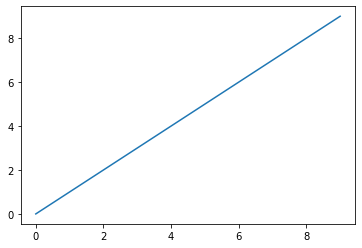

In [57]:
%matplotlib inline
datap = np.arange(10)
datap
plt.plot(datap)

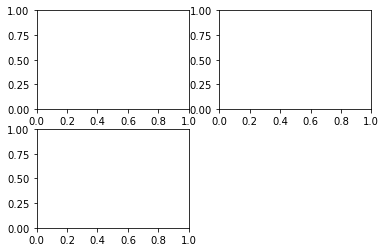

In [97]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

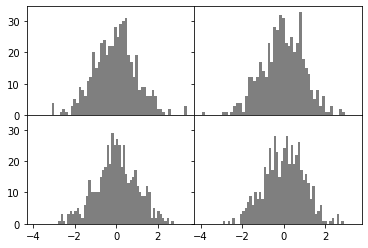

In [60]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
#! figure,id=mpl_subplots_adjust,width=4in,title="Data visualization with no inter-subplot spacing"
fig.subplots_adjust(wspace=0, hspace=0)

In [111]:
plt.close("all")


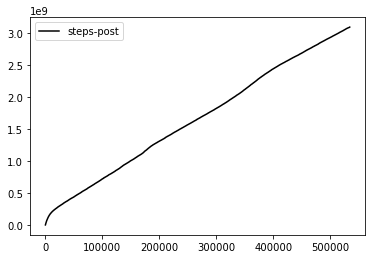

In [127]:
fig = plt.figure()
ax = fig.add_subplot()
data = pd.DataFrame(dfrev,columns=["rpt_as_rev"]).cumsum()
#ax.plot(data, color="blue", linestyle="dashed", label="Default"); #dashed line
ax.plot(data, color="black", linestyle="solid",drawstyle="steps-post", label="steps-post"); #solid line
ax.legend()